In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../') # refractive is not in my default path. Change it according to your

from refractive import water
from refractive import ice

In [2]:
Temperature = np.array(260.0)
Frequencies = np.linspace(1,250,1000)

n_wat = water.n(Temperature, Frequencies)
n_ice =   ice.n(Temperature, Frequencies)


Now plot the results

Text(0.5,1,'Refractive index')

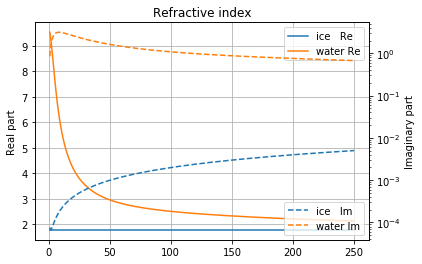

In [3]:
f, ax = plt.subplots()
ax.plot(Frequencies, n_ice.real,label='ice   Re')
ax.plot(Frequencies, n_wat.real,label='water Re')
ax.legend()
ax.grid()
ax.set_ylabel('Real part')
axt = ax.twinx()
axt.plot(Frequencies, n_ice.imag,'--',label='ice   Im')
axt.plot(Frequencies, n_wat.imag,'--',label='water Im')
axt.set_yscale('log')
axt.legend()
axt.set_ylabel('Imaginary part')
ax.set_title('Refractive index')